<a href="https://colab.research.google.com/github/KunaCornejo/SmartGatewaySelection/blob/main/MarkovProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from random import seed
from random import random
from numpy import genfromtxt
from scipy.linalg import eig
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker
from matplotlib.pyplot import figure
from matplotlib.pyplot import grid

In [2]:
#import git
!git clone https://github.com/KunaCornejo/SmartGatewaySelection.git

Cloning into 'SmartGatewaySelection'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 81 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (81/81), done.


In [3]:
ls 'SmartGatewaySelection'

avai_12_d_80.csv  Locaciones.csv           out_4_d_80.csv
avai_16_d_80.csv  MarkovProcess.ipynb      out_8_d_80.csv
avai_4_d_80.csv   Matriz_Train_90.csv.zip  Pout.csv
avai_8_d_80.csv   out_12_d_80.csv          P_out_Results.csv
c_n_ul.csv        out_16_d_80.csv          SmartSelection.ipynb


In [4]:
#Outage Probabilities (Pout) were obtained from the Recommendation ITU-R P.837 
Pout = genfromtxt('/content/SmartGatewaySelection/Pout.csv', delimiter=',') 
Pout=list(Pout)
locations=['Panama','San Jose','Tegucigalpa','Mexico City','Monterrey','Guadalajara'\
             ,'Tijuana','La Habana','Sto. Domingo','San Salvador','San Juan',\
             'Torreon','La Paz (BC)','Veracruz','Cancun','Queretaro'\
             ,'Tuxtla (Gtz)','Cd. Juarez','San Pedro Sula','Belmopan','Kingston'\
             ,'Merida','Pto. Cabezas','Oaxaca']
locations=np.transpose([locations])
Pout=np.array([Pout],dtype=object)
Pout=np.transpose(Pout)

In [5]:
P_out=np.concatenate((locations,Pout/100),axis=1) #Concatenate two lists, Outage Probabilities
P_avai=np.concatenate((locations,1-(Pout/100)),axis=1) #oncatenate two lists, 1-Pout

In [6]:
# Python code to sort the array using second element  
# of sublist Function to sort using sorted() 
def Sort(sub_li): 
    return(sorted(sub_li, key = lambda x: x[1], reverse = True)) 
P_avai= np.array(Sort(P_avai))  #Testing the sorted list
print(P_avai)#1-P0_i
#If you want to save the list
#np.savetxt('/.../Lista_Ordenada.csv',P_avai,fmt='%s',delimiter=',')

[['La Paz (BC)' 0.996159]
 ['Torreon' 0.994467]
 ['Cd. Juarez' 0.992021]
 ['Merida' 0.983967]
 ['Monterrey' 0.983478]
 ['Tijuana' 0.982616]
 ['Queretaro' 0.979687]
 ['Cancun' 0.975239]
 ['Oaxaca' 0.973763]
 ['La Habana' 0.97287]
 ['Tegucigalpa' 0.972761]
 ['Tuxtla (Gtz)' 0.972703]
 ['Guadalajara' 0.972293]
 ['Kingston' 0.971399]
 ['Veracruz' 0.970905]
 ['Sto. Domingo' 0.967115]
 ['San Juan' 0.967112]
 ['Mexico City' 0.964513]
 ['San Salvador' 0.963801]
 ['San Pedro Sula' 0.961438]
 ['Panama' 0.959222]
 ['Belmopan' 0.956845]
 ['Pto. Cabezas' 0.947301]
 ['San Jose' 0.93558]]


Here, we define transition probabilities of **Markov Chain** based on the scheme $1+\bar{P}$

In [7]:
#Scheme Configuration N=4,8,12, or 16.
N=16
P=len(P_avai[:,0])-N
#Create a Transition Matrix
T=np.zeros((3*(1+P),3*(1+P)),dtype=float)
SD=np.zeros((3*(1+P),N),dtype=float)  #To store the stationary distributions
#Transition Probabilities
P_out_desired=1e-4

for i in range(0,N): #N #Define NGW_i 
    k=0 #PGW counter
    for j in range(0,3*(1+P),3): #3 states by 3 states
        if j==0: #Only for NGW_i
            T[0,j]=P_avai[i,1]
            T[0,j+1]=P_out_desired
            T[0,j+2]=(1-P_avai[i,1])-P_out_desired
            
            T[1,j]=P_avai[i,1]
            T[1,j+1]=P_out_desired
            T[1,j+2]=(1-P_avai[i,1])-P_out_desired
        elif j==3: #Emphasize in First PGW
            T[j-1,j]=P_avai[N+k,1]
            T[j-1,j+1]=P_out_desired
            T[j-1,j+2]=(1-P_avai[N+k,1])-P_out_desired
            
            T[j,j]=P_avai[N+k,1]
            T[j,j+1]=P_out_desired
            T[j,j+2]=(1-P_avai[N+k,1])-P_out_desired
            
            T[j+1,j]=P_avai[N+k,1]
            T[j+1,j+1]=P_out_desired
            T[j+1,j+2]=(1-P_avai[N+k,1])-P_out_desired
        elif j==3*(1+P)-3:
            k+=1
            T[j-1,0]=P_avai[i,1]
            T[j-1,1]=P_out_desired
            T[j-1,j]=(1-P_avai[i,1])-P_out_desired
            
            T[j,j]=P_avai[N+k,1]
            T[j,j+1]=P_out_desired
            T[j,j+2]=(1-P_avai[N+k,1])-P_out_desired
            
            T[j+1,j]=P_avai[N+k,1]
            T[j+1,j+1]=P_out_desired
            T[j+1,j+2]=(1-P_avai[N+k,1])-P_out_desired
                       
            #End Matrix return to NGW_i
            T[j+2,0]=P_avai[i,1]
            T[j+2,1]=P_out_desired
            T[j+2,2]=(1-P_avai[i,1])-P_out_desired
        else:
            k+=1
            T[j-1,0]=P_avai[i,1]
            T[j-1,1]=P_out_desired
            T[j-1,j]=(1-P_avai[i,1])-P_out_desired
            
            T[j,j]=P_avai[N+k,1]
            T[j,j+1]=P_out_desired
            T[j,j+2]=(1-P_avai[N+k,1])-P_out_desired
            
            T[j+1,j]=P_avai[N+k,1]
            T[j+1,j+1]=P_out_desired
            T[j+1,j+2]=(1-P_avai[N+k,1])-P_out_desired 
    #To save results into a .csv file         
    #np.savetxt(f'/.../{N}_{i}.csv',T,fmt='%s',delimiter=',')

In [8]:
    #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    #Stationary Distribution
    #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
    #Code for finding the stationary distribution
    S, U = eig(T.T)
    stationary = np.array(U[:, np.where(np.abs(S - 1.) < 1e-8)[0][0]].flat)
    stationary = stationary / np.sum(stationary)
    stationary = stationary.real
    
    SD[:,i]=stationary
    #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
    print(T)
    print('\n')
    print(T.shape)
    print('\n')
    print(stationary)
    print('\n')
    print(stationary.shape)
    print('\n')

#To Save the Stationary Distribution into .csv file
#np.savetxt(f'/.../Stationary_{N}.csv',SD,fmt='%s',delimiter=',')

[[9.67115e-01 1.00000e-04 3.27850e-02 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00]
 [9.67115e-01 1.00000e-04 3.27850e-02 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 9.67112e-01 1.00000e-04 3.27880e-02
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e

[[0.03301344 0.10717298 0.19968589 0.29025326]
 [0.01236677 0.04299781 0.09177406 0.12939876]
 [0.00052814 0.001604   0.00335901 0.00503988]
 [0.00040144 0.00081582 0.00094641 0.00128603]
 [       nan        nan 0.00090052 0.00090108]]


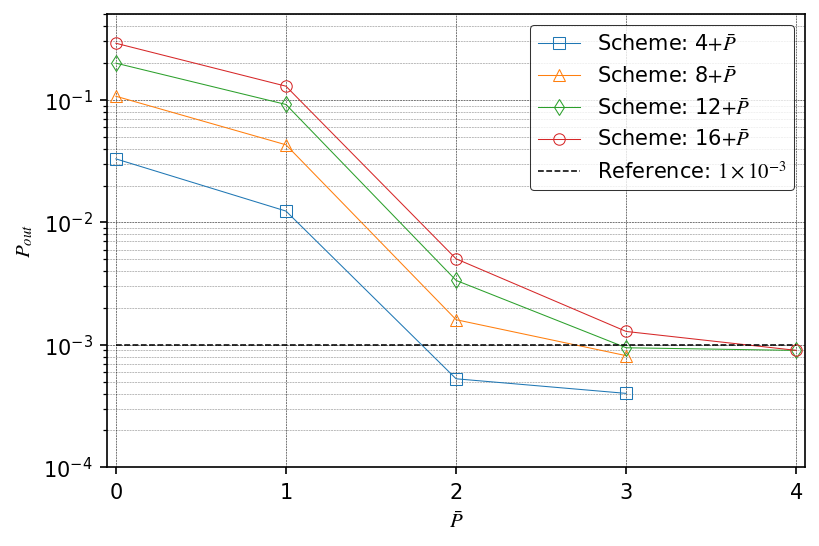

In [13]:
#Figure: Pout vs PGWs
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
fig, ax=plt.subplots(num=None, figsize=(6, 4), dpi=150, facecolor='w', edgecolor='k')
grid(color='k', linestyle='--', linewidth=.25, which='minor', alpha=0.5)
grid(color='k', linestyle='--', linewidth=.25, which='major', alpha=1)
font={'fontname':'Times','weight':'light','size':10}
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N_0=[4,8,12,16]
forms=['s','^','d','o','d','>']
lines=['-','--',':','-','--',':']
#In this file, P_out_Results.csv, has been compiled the results of all schemes 
#by the Markov Process, that is, N=4,8,12, and 16.
P_out_SD = genfromtxt(f'/content/SmartGatewaySelection/P_out_Results.csv', delimiter=',',dtype=float,autostrip=True)
P_out_SD = np.array(P_out_SD,dtype=float)
print(P_out_SD)

for i in range(0,len(N_0)):  
    esquema=r'$+\bar{P}$'
    numero=f'Scheme: {N_0[i]}'
    etiqueta=numero+esquema
    x=np.arange(len(P_out_SD[:,i]))
    ax.semilogy(x,P_out_SD[:,i],f'-{forms[i]}',markersize=5.5, markerfacecolor='None',markeredgewidth=0.5,linewidth=0.5,label=etiqueta)
        
    
    xint = range(min(x), k-1) 
    plt.xticks(xint)    
    
plt.semilogy(x,pd.Series(1-0.999, index=x),'--', linewidth=0.75,color='k',label=r'Reference: $1\times 10^{-3}$') 
plt.axis([-0.05, 4.05, 5e-1,1e-4])
plt.gca().invert_yaxis()
plt.xlabel(r'$\bar{P}$',**font)
plt.ylabel(r'$P_{out}$',**font)

ax.set_yscale("log")

locmaj = matplotlib.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

leg=plt.legend(loc='upper right',fontsize=10)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(0.5)
            
plt.rcParams["font.family"] = "Sans"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times:italic'
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

#To save the figure
#plt.savefig('/.../P_out_SD.png')

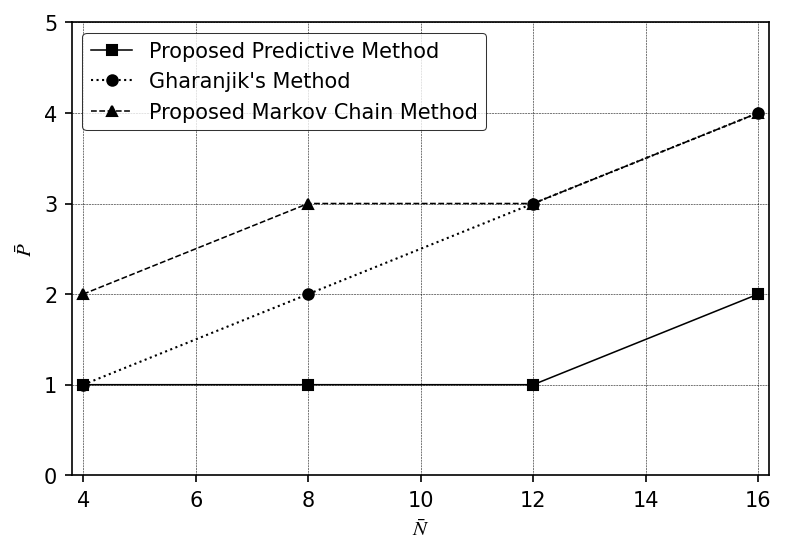

In [16]:
#Comparison Figure, N+P
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
fig, ax=plt.subplots(num=None, figsize=(6, 4), dpi=150, facecolor='w', edgecolor='k')
grid(color='k', linestyle='--', linewidth=.25, which='minor', alpha=0.5)
grid(color='k', linestyle='--', linewidth=.25, which='major', alpha=1)
font={'fontname':'Times','weight':'light','size':10}
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N_0=[4,8,12,16]
P_0=[1,2,3,4]
forms=['s','^','d','o','d','>']
lines=['-','--',':','-','--',':']

Deterministic=[1,1,1,2] #Prediction method using LSTM rain attenuation model
Probabilistic=[2,3,3,4] #Using the Markov Process
Gharanjik=[1,2,3,4]     #Data gathered from Gharanjik's method

plt.plot(N_0,Deterministic,'-s', linewidth=0.75,color='k',markerfacecolor='k',markersize=5,label='Proposed Predictive Method') 
plt.plot(N_0,Gharanjik,':o', linewidth=1,color='k',markerfacecolor='k',markersize=5,label='Gharanjik\'s Method') 
plt.plot(N_0,Probabilistic,'--^', linewidth=0.75,color='k',markerfacecolor='k',markersize=5,label='Proposed Markov Chain Method') 


plt.axis([3.8, 16.20, 0,5])
plt.xlabel(r'$\bar{N}$',**font)
plt.ylabel(r'$\bar{P}$',**font)



leg=plt.legend(loc='upper left',fontsize=10)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(0.5)
            
plt.rcParams["font.family"] = "Times"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times:italic'
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

#To save the figure 
#plt.savefig('/.../N-P-2D.png')